In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

#tf.__version__
#keras.__version__ 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
np.max(X_train_full[0,:, :])

255

In [5]:
y_train_full.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

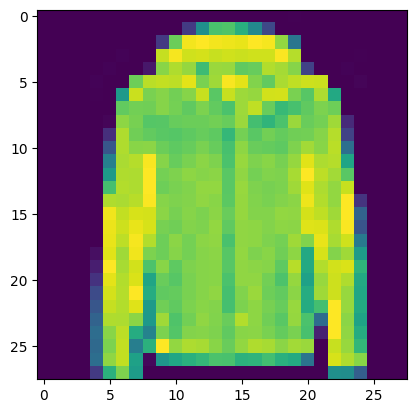

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

### Build an artificial neural network (ANN) using the sequantial model
### (ANN) will take the input of the fashion minst images
### ANN will have 4 layers: 
#### First layer has 64 artificial neurons ( A.K.A units)
#### Second layer has 32  units 
#### Thrid layer has 16  units
#### Fourth layer  has 10  neurons ( A.K.A units)
#### Fifth layer - output layer has 10 units

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()


model.add(Dense(64, activation='relu', input_shape=(784,))) 
model.add(Dense(32, activation='relu')) 
model.add(Dense(16, activation='relu'))  
model.add(Dense(10, activation='relu'))  
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 53,128
Trainable params: 53,128
Non-trainable params: 0
_________________________________________________________________


### Compile the network using sgd or adam as optimizer

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the network for 20 epochs

In [19]:
from tensorflow.keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0512 - accuracy: 0.8970 - val_loss: 0.0622 - val_accuracy: 0.8769
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0498 - accuracy: 0.8981 - val_loss: 0.0618 - val_accuracy: 0.8794
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0484 - accuracy: 0.9022 - val_loss: 0.0656 - val_accuracy: 0.8692
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0476 - accuracy: 0.9039 - val_loss: 0.0619 - val_accuracy: 0.8815
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0464 - accuracy: 0.9067 - val_loss: 0.0658 - val_accuracy: 0.8736
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0457 - accuracy: 0.9086 - val_loss: 0.0609 - val_accuracy: 0.8830
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0450 - accuracy: 0.9103 - val_loss: 0.0618 - val_accuracy

(0.0, 1.0)

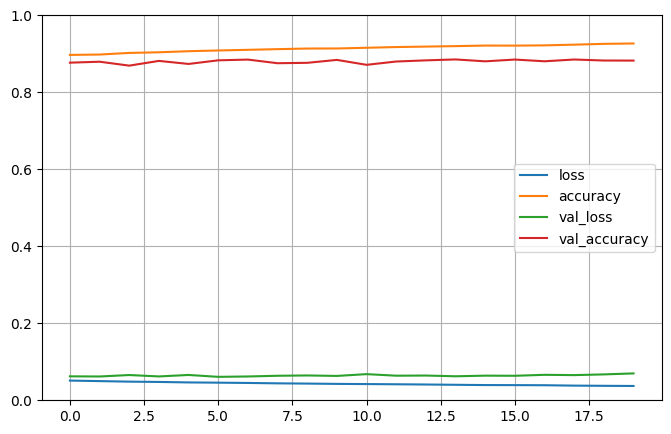

In [20]:
import pandas as pd
plt=pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

### Evaluate the accuracy of the model (the network)

In [22]:
accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.8823
[0.06977652758359909, 0.8823000192642212]


### Predict the label of the thrid data point in the X_test

In [27]:
pred = model.predict(X_test[[2]])
print(pred)

1/1 [==============================] - 0s 38ms/step
[[2.4647795e-17 1.0000000e+00 3.2479424e-20 5.3246757e-15 5.6369297e-15
  3.0414394e-16 4.5244593e-16 1.4843615e-31 7.5914108e-19 2.1991332e-22]]


## Now Build a CNN model to classify the different images of the fashion minst dataset
### the CNN will take the input of the fashion minst images
### CNN will have 6 layers: 
#### First layer is a convolutional layer with 6 filters size 3x3 stride of 1 has padding 
#### Second is a maxpooling layer with a 2x2 kernel size
#### Thrid layer is a convolutional layer with 8 filters size 3x3 stride of 1 has padding 
#### Fourth layer is a maxpooling layer with a 2x2 kernel size
#### Fifth layer is a fully connected (desnse layer) with a 16 units 
#### Sixth layer - fully connected output layer has 10 units

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(6, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))



model.summary()

### Compile the network

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the network

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

model.fit(X_train, y_train, epochs=20, batch_size=32)


### Evlauate the network (model)

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print(accuracy)